# Credit Card Fraud Detection: Capstone Project (BA)

In [1]:
#modelues for EDA steps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

# For avoiding warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1-Reading and understanding the data

In [2]:
df1 = pd.read_csv(r"J:\Fraud Detection Capstone project/fraudTrain.csv")

In [3]:
df2 = pd.read_csv(r"J:\Fraud Detection Capstone project/fraudTest.csv")

In [4]:
print(df1.shape)

(1296675, 23)


In [5]:
print(df2.shape)

(555719, 23)


### Train Data

In [6]:
# To display All the columns
pd.set_option('display.max_columns', None)
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Test Data

In [7]:
# To display All the columns
pd.set_option('display.max_columns', None)
df2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Step 2 - Data preparation

- We can concatenate the data for preprocessing and cleaning work.
- Later we can seperate back the train and test data based on labels that we will provide.

In [8]:
# Giving labels to train and test data first
df1['Label'] = 'Train'
df2['Label'] = 'Test'

In [9]:
# Concatenating the 2 datasets into 1.
df = pd.concat([df1,df2])
df.shape

(1852394, 24)

In [10]:
# Checking data types and nullvalues.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [11]:
# Check for any duplicate values in the data.
df.duplicated().sum()

0

- Since there are no null values, duplicate avlues so we can move further with data preparation.
- We need to change the data type of 'trans_date_trans_time' and 'dob' column to Datetime.

In [12]:
# Converting the column 'trans_date_trans_time' and 'dob' to Datetime datatype.
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

- Lets drop the columns which are of no use to us.
- The columns ['Unnamed: 0','cc_num','merchant','first','last','street','zip','trans_num','unix_time'] are of no use to our analysis.

In [13]:
df.drop(['Unnamed: 0','cc_num','merchant','first','last','street','zip','job','trans_num','unix_time'],axis=1,inplace=True)
print(len(df.columns))

14


### Feature Extraction

> 1. We can extract hour day and month from the trans_date_trans_time column.

In [14]:
# Extracting hour
df['hour'] = df['trans_date_trans_time'].dt.hour

# Month
df['month'] = df['trans_date_trans_time'].dt.month

# Day
df['day'] = df['trans_date_trans_time'].dt.day_name()

In [15]:
df.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,Label,hour,month,day
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,Train,0,1,Tuesday
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,Train,0,1,Tuesday
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,Train,0,1,Tuesday
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,Train,0,1,Tuesday
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,Train,0,1,Tuesday


> 2. Lets get Age from 'dob' column

In [16]:
# Converting age into days then into years
df['customer_age'] = (df['trans_date_trans_time'] - df['dob']).astype('timedelta64[Y]')

In [17]:
df['customer_age']

0         30.0
1         40.0
2         56.0
3         51.0
4         32.0
          ... 
555714    54.0
555715    21.0
555716    39.0
555717    55.0
555718    27.0
Name: customer_age, Length: 1852394, dtype: float64

In [18]:
# sns.distplot(df['customer_age'])
plt.show()

<AxesSubplot:xlabel='customer_age'>

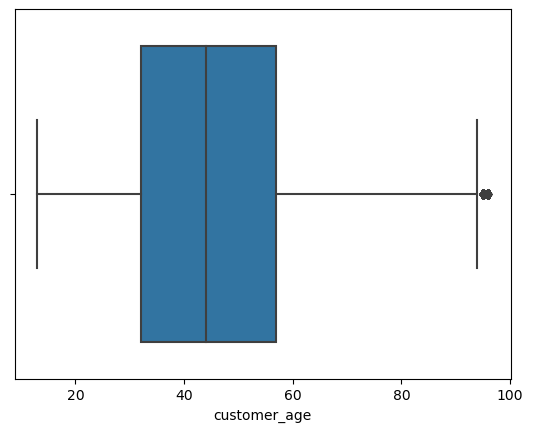

In [19]:
# So we can make this feature a categorical variable with different age categories.
sns.boxplot(df['customer_age'])

> 3. You can use the latitudes and longitudes to find the distance between the customer and transaction location.

In [20]:
# In this method, we use the math module to calculate the distance between two points using their latitude and longitude coordinates
from math import radians, sin, cos, acos

In [21]:
# here i have created a function to calculate the distance.
def haversine_distance(lat1,lon1,lat2,lon2):
  mlat = radians(float(lat1))
  mlon = radians(float(lon1))
  plat = radians(float(lat2))
  plon = radians(float(lon2))
  
  dist = 6371.01 * acos(sin(mlat)*sin(plat) + cos(mlat)*cos(plat)*cos(mlon - plon))
  return np.round(dist,2)

In [22]:
# Here i am using lambda function to save all the distances in a column named distance.
df['distance'] = df.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [23]:
df.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,Label,hour,month,day,customer_age,distance
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,Train,0,1,Tuesday,30.0,78.60
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,Train,0,1,Tuesday,40.0,30.21
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,Train,0,1,Tuesday,56.0,108.21
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,Train,0,1,Tuesday,51.0,95.67
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,Train,0,1,Tuesday,32.0,77.56


In [24]:
# So we can drop the columns which are of no use.
df.drop(['trans_date_trans_time','city','lat','long','merch_lat','dob','merch_long'],axis=1,inplace=True)

In [25]:
df.shape

(1852394, 12)

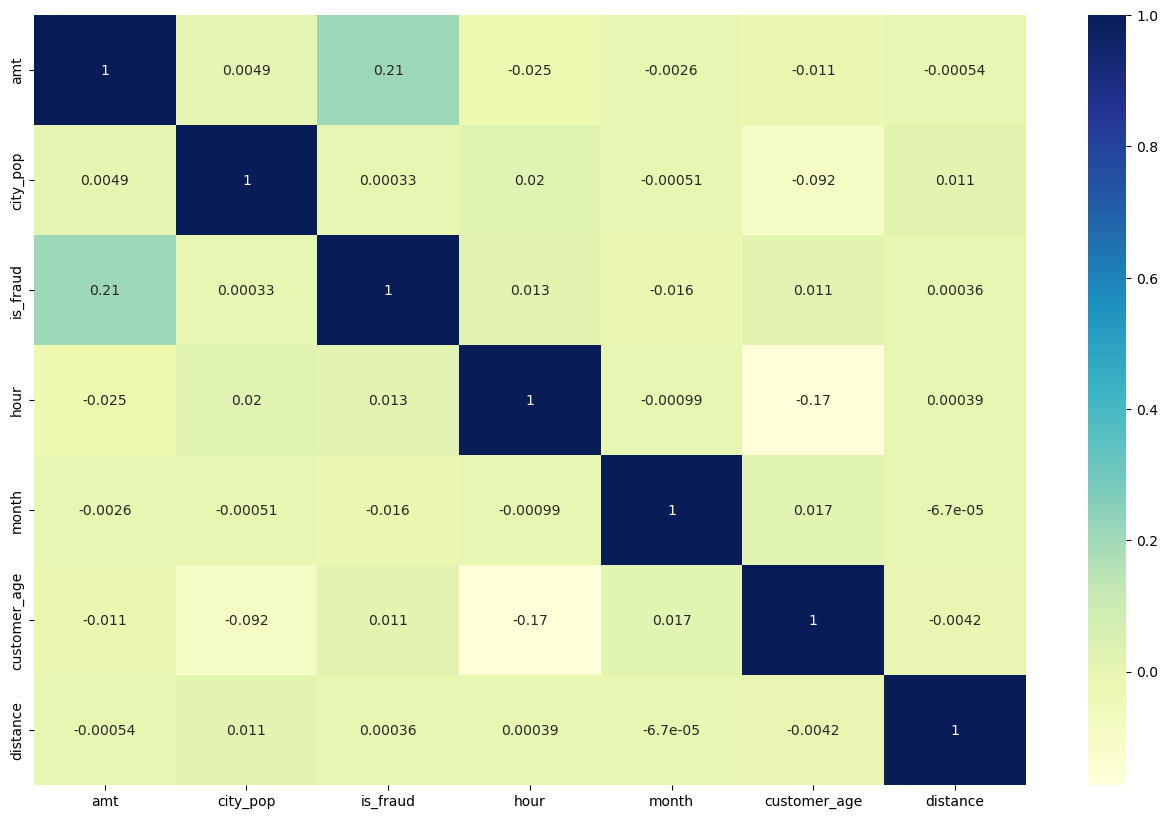

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [27]:
# Lets check how our target variable is distributed.
plot = df['is_fraud'].value_counts(normalize=True)

In [28]:
df['is_fraud'].value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

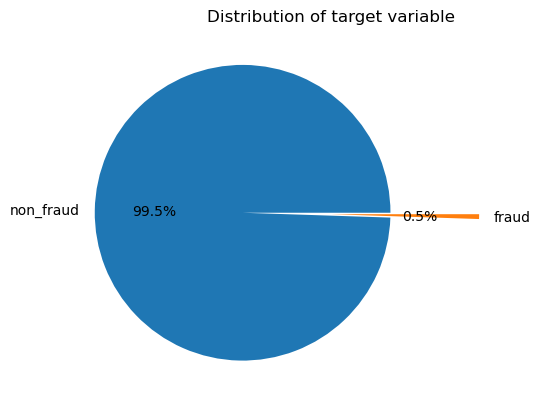

In [29]:
plt.pie(plot,labels = ['non_fraud','fraud'],autopct='%1.1f%%',explode = [0.6, 0])
plt.title("Distribution of target variable")
plt.show()

In [30]:
# Since this is highly imbalanced data we need to do data balencing while building the model.

In [31]:
# lets now do the encoding of variables as most of the variables are categorical variables.
cat_columns = df.select_dtypes(exclude = np.number).columns
cat_columns

Index(['category', 'gender', 'state', 'Label', 'day'], dtype='object')

In [32]:
df.head()

,category,amt,gender,state,city_pop,is_fraud,Label,hour,month,day,customer_age,distance
0,misc_net,4.97,F,NC,3495,0,Train,0,1,Tuesday,30.0,78.60
1,grocery_pos,107.23,F,WA,149,0,Train,0,1,Tuesday,40.0,30.21
2,entertainment,220.11,M,ID,4154,0,Train,0,1,Tuesday,56.0,108.21
3,gas_transport,45.00,M,MT,1939,0,Train,0,1,Tuesday,51.0,95.67
4,misc_pos,41.96,M,VA,99,0,Train,0,1,Tuesday,32.0,77.56


### Lets check columnwise data and do the necessary changes

### 1. Category column

In [33]:
df['category'].value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

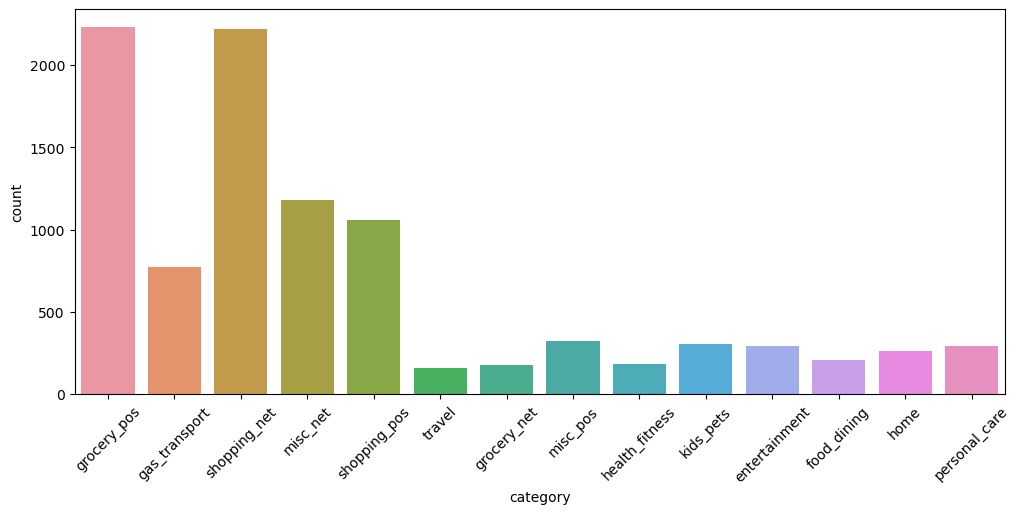

In [34]:
# Lets check category wise fraud count so we will get an idea.
plt.figure(figsize=(12,5))
sns.countplot(x=df[df['is_fraud']==1].category)
plt.xticks(rotation=45)
plt.show()

In [35]:
dummy1 = pd.get_dummies(df['category'],drop_first=True)
df = pd.concat([df,dummy1],axis=1)

In [36]:
df = df.drop(['category'],axis=1)

### 2. Gender

In [37]:
df['gender'].value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

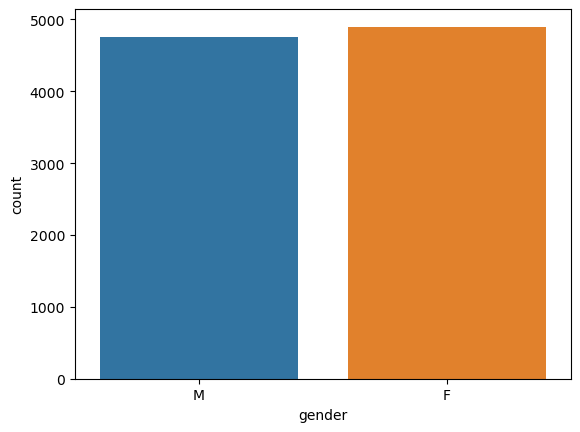

In [38]:
# Lets check Gender wise fraud count so we will get an idea.
sns.countplot(x=df[df['is_fraud']==1].gender)
plt.show()

In [39]:
dummy2 = pd.get_dummies(df['gender'],drop_first=True)
df = pd.concat([df,dummy2],axis=1)
df = df.drop(['gender'],axis=1)

In [40]:
df.rename(columns = {"M":"Male"},inplace=True)

### 3. State

In [41]:
df['state'].nunique()

51

In [42]:
df['state'].value_counts(normalize=True)*100

TX    7.302388
NY    6.446739
PA    6.163538
CA    4.345458
OH    3.596805
MI    3.553510
IL    3.358465
FL    3.280889
AL    3.159209
MO    2.963948
MN    2.452664
AR    2.408289
NC    2.328554
VA    2.254164
WI    2.253192
SC    2.252814
KY    2.212326
IN    2.134481
IA    2.094803
OK    2.054099
MD    2.016040
GA    2.015770
WV    1.971989
NJ    1.896519
NE    1.858406
KS    1.778185
MS    1.620660
LA    1.616989
WY    1.499465
WA    1.459733
OR    1.425615
TN    1.344908
ME    1.265012
NM    1.264688
ND    1.143547
CO    1.067052
SD    0.948718
MA    0.948070
VT    0.907582
MT    0.907258
AZ    0.829305
UT    0.829035
NH    0.633073
CT    0.592692
NV    0.435005
ID    0.433763
DC    0.276939
HI    0.196988
AK    0.159955
RI    0.040218
DE    0.000486
Name: state, dtype: float64

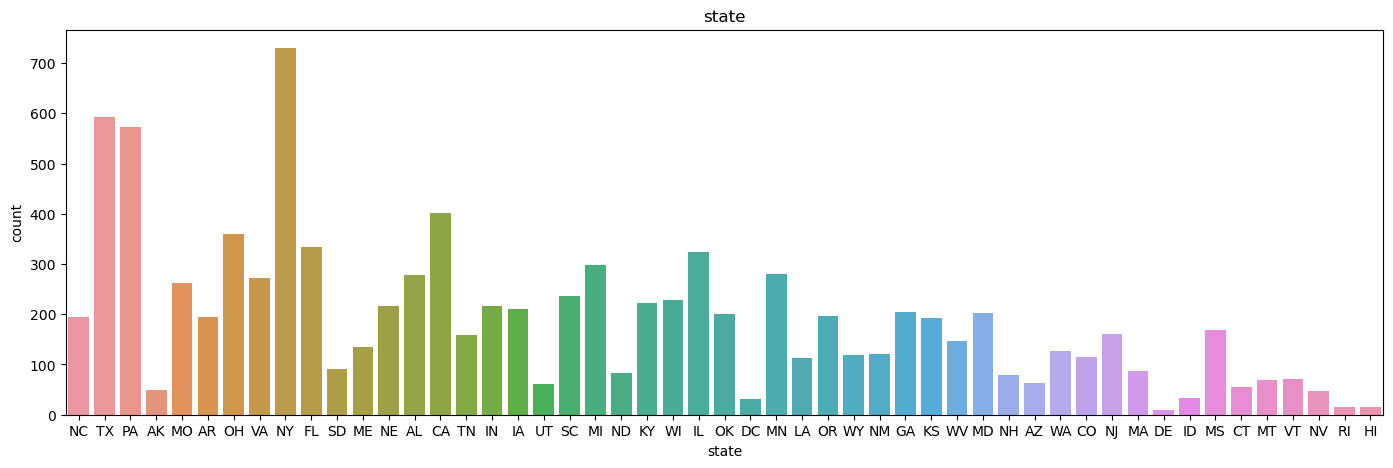

In [43]:
# The fraud transactions by State are as follows.
plt.figure(figsize=(17,5))
plt.title('state')
sns.countplot(x=df[df['is_fraud']==1].state)
plt.show()

In [44]:
# The top 5 states which has most fraud transactions are Texas, New york, PA, California and Ohio.

In [45]:
# Lets reduce the categories and keep a threshold of 1% where categories less than 1% will fall into Ohter states.
counts = df['state'].value_counts(normalize=True)*100
threshold = 3.58

In [46]:
switch = counts[counts<threshold].index

In [47]:
dummy3 = pd.get_dummies(df['state'].replace(switch,"Others"))

In [48]:
df = pd.concat([df,dummy3],axis=1)

In [49]:
# Now we can drop the State column and any one column from the dummy variable created
df.drop(['state','OH'],axis=1,inplace=True)

In [50]:
df.head()

,amt,city_pop,is_fraud,Label,hour,month,day,customer_age,distance,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,Male,CA,NY,Others,PA,TX
0,4.97,3495,0,Train,0,1,Tuesday,30.0,78.60,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,107.23,149,0,Train,0,1,Tuesday,40.0,30.21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,220.11,4154,0,Train,0,1,Tuesday,56.0,108.21,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,45.00,1939,0,Train,0,1,Tuesday,51.0,95.67,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,41.96,99,0,Train,0,1,Tuesday,32.0,77.56,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


### 4. Hour

In [51]:
df['hour'].value_counts()

23    95902
22    95370
16    94289
18    94052
21    93738
17    93514
13    93492
15    93439
19    93433
12    93294
14    93089
20    93081
1     61330
3     60968
2     60796
0     60655
8     60498
6     60406
10    60320
7     60301
9     60231
11    60170
5     60088
4     59938
Name: hour, dtype: int64

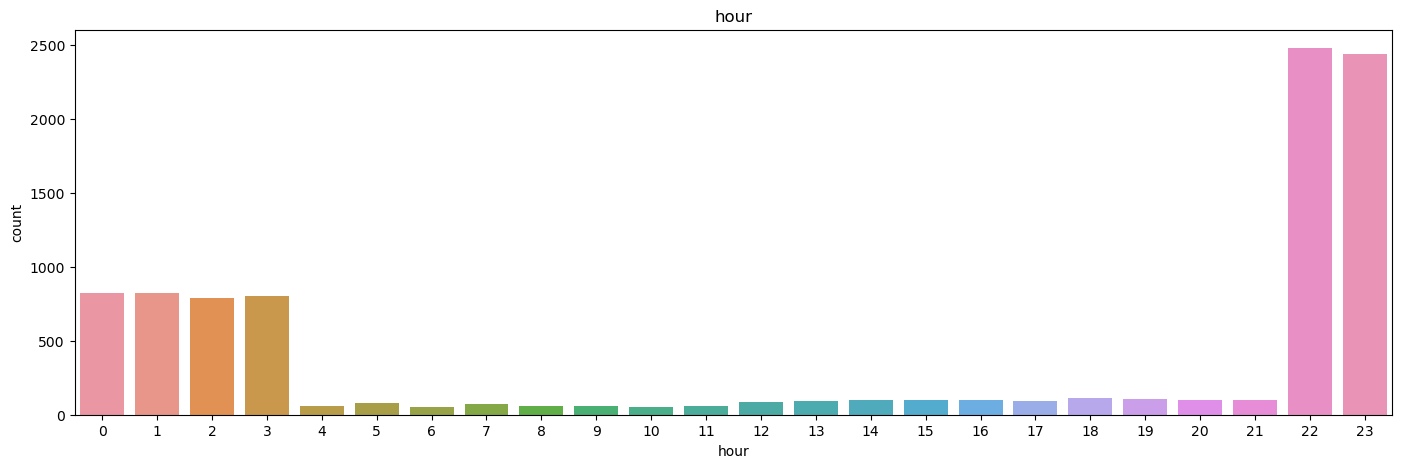

In [52]:
# The fraud transactions by hour are as follows.
plt.figure(figsize=(17,5))
plt.title('hour')
sns.countplot(x=df[df['is_fraud']==1].hour)
plt.show()

- We can see that mostly after 12th hour the fraud transactions have increased.
- It is obvious that mostly fraud transactions are during day time as people tend to shop during the day time.

In [53]:
# We are making bins for different time intervals
bins = [0, 5, 11, 17, 23]
labels = ['0-5', '6-11', '12-17', '18-23']
df['grade'] = pd.cut(x = df['hour'], bins = bins, labels = labels, include_lowest = True)

In [54]:
df['grade'].value_counts()

18-23    565576
12-17    561117
0-5      363775
6-11     361926
Name: grade, dtype: int64

In [55]:
dummy4 = pd.get_dummies(df['grade'],drop_first=True)
df = pd.concat([df,dummy4],axis=1)
df = df.drop(['grade','hour'],axis=1)

### 5. Month

In [56]:
df['month'].value_counts()

12    280598
8     176118
6     173869
7     172444
5     146875
3     143789
11    143056
9     140185
10    138106
4     134970
1     104727
2      97657
Name: month, dtype: int64

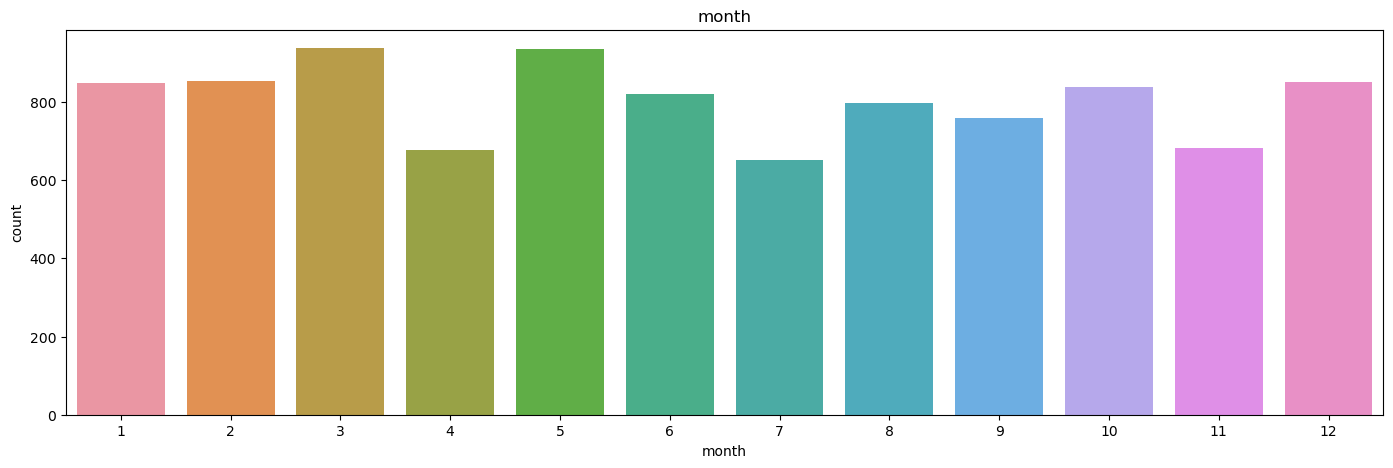

In [57]:
# The fraud transactions by month are as follows.
plt.figure(figsize=(17,5))
plt.title('month')
sns.countplot(x=df[df['is_fraud']==1].month)
plt.show()

In [58]:
dummy5 = pd.get_dummies(df['month'],drop_first=True)
df = pd.concat([df,dummy5],axis=1)
df = df.drop(['month'],axis=1)

### 6. Day

In [59]:
df['day'].value_counts()

Monday       369418
Sunday       343677
Tuesday      270340
Saturday     263227
Friday       215078
Thursday     206741
Wednesday    183913
Name: day, dtype: int64

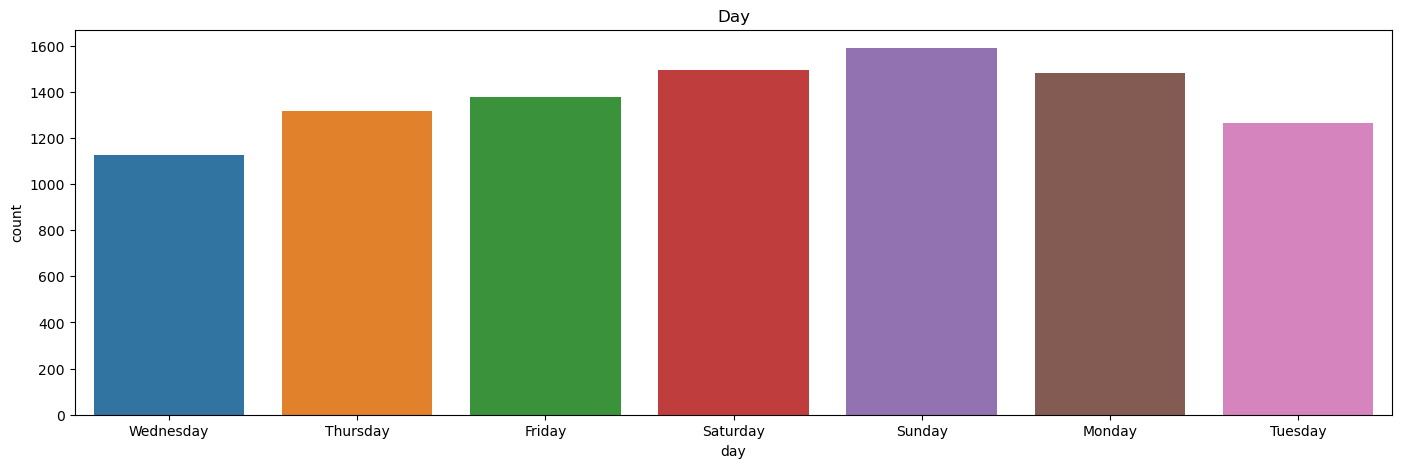

In [60]:
# The fraud transactions by Day are as follows.
plt.figure(figsize=(17,5))
plt.title('Day')
sns.countplot(x=df[df['is_fraud']==1].day)
plt.show()

In [61]:
dummy6 = pd.get_dummies(df['day'],drop_first=True)
df = pd.concat([df,dummy6],axis=1)
df = df.drop(['day'],axis=1)

## Outlier treatment

### 7. Amt 'Amount'

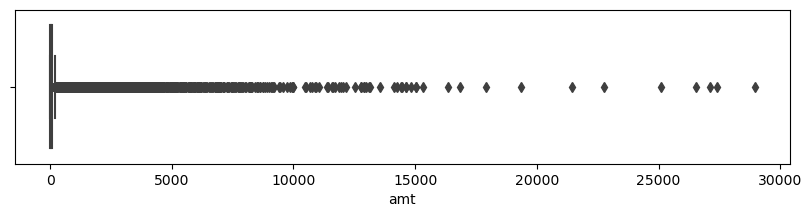

In [62]:
plt.figure(figsize=(10,2))
sns.boxplot(df['amt'])
plt.show()

<AxesSubplot:xlabel='amt', ylabel='Density'>

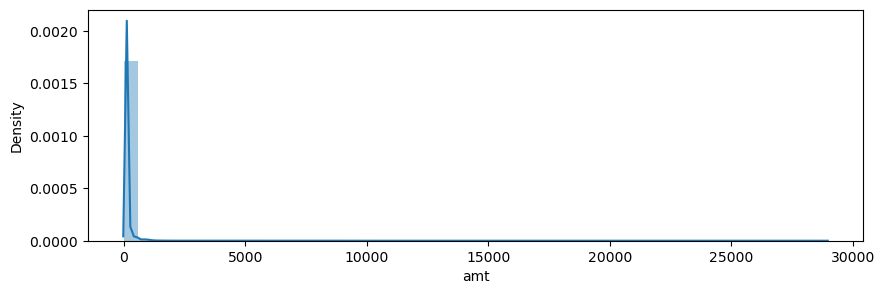

In [63]:
plt.figure(figsize=(10,3))
sns.distplot(df['amt'])

- Since there are huge outliers and data clearly seems to be skewed
- we need to treat this outliers by capping technique as they are huge in numbers.

In [64]:
df1 = df[df['is_fraud']==0]
df2 = df[df['is_fraud']==1]

### For non fraud amount

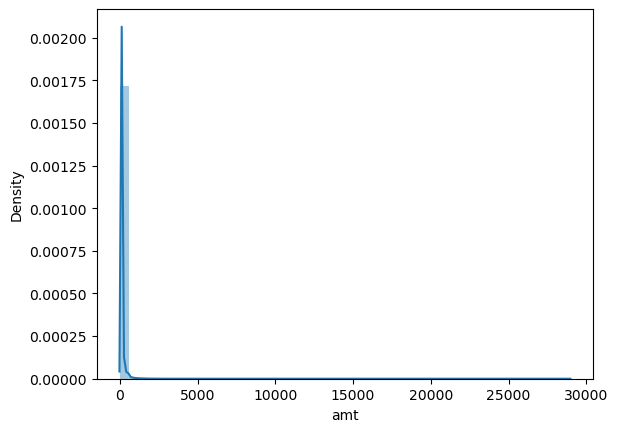

In [65]:
sns.distplot(df1['amt'])
plt.show()

### For fraud amount

<AxesSubplot:xlabel='amt', ylabel='Density'>

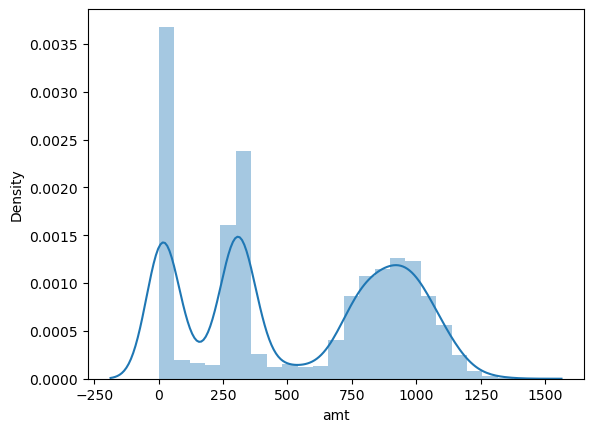

In [66]:
sns.distplot(df2['amt'])

In [67]:
df['amt'].describe(percentiles=[0.1,0.25,0.50,0.75,0.80,0.86,0.90,0.95,0.96,0.97,0.98,0.99])

count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
10%      4.100000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
80%      9.459000e+01
86%      1.149900e+02
90%      1.363300e+02
95%      1.953400e+02
96%      2.130500e+02
97%      2.451500e+02
98%      3.327100e+02
99%      5.379000e+02
max      2.894890e+04
Name: amt, dtype: float64

In [68]:
percentile = df['amt'].quantile([0.05,0.94]).values
df['amt'][df['amt']<= percentile[0]] = percentile[0]
df['amt'][df['amt']>= percentile[1]] = percentile[1]

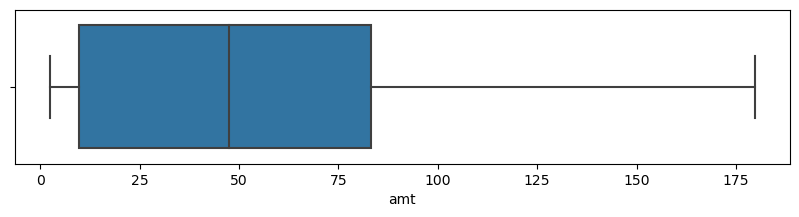

In [69]:
plt.figure(figsize=(10,2))
sns.boxplot(df['amt'])
plt.show()

### 8. City population

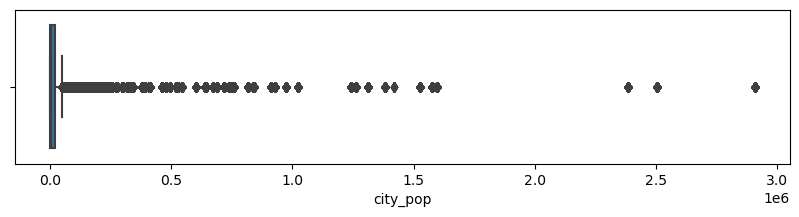

In [70]:
plt.figure(figsize=(10,2))
sns.boxplot(df['city_pop'])
plt.show()

In [71]:
df['city_pop'].describe(percentiles=[0.1,0.25,0.50,0.75,0.80,0.86,0.90,0.95,0.96,0.97,0.98,0.99])

count    1.852394e+06
mean     8.864367e+04
std      3.014876e+05
min      2.300000e+01
10%      2.600000e+02
25%      7.410000e+02
50%      2.443000e+03
75%      2.032800e+04
80%      4.238400e+04
86%      9.432500e+04
90%      1.861400e+05
95%      5.257130e+05
96%      6.872760e+05
97%      9.101480e+05
98%      1.263321e+06
99%      1.577385e+06
max      2.906700e+06
Name: city_pop, dtype: float64

In [72]:
percentile = df['city_pop'].quantile([0.05,0.81]).values
df['city_pop'][df['city_pop']<= percentile[0]] = percentile[0]
df['city_pop'][df['city_pop']>= percentile[1]] = percentile[1]

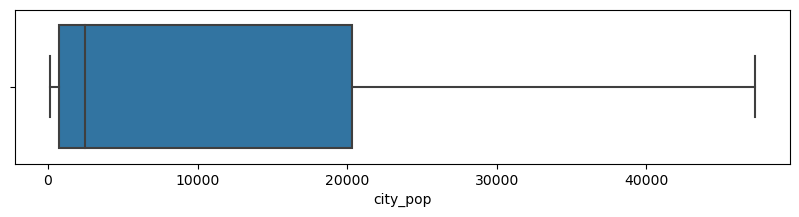

In [73]:
plt.figure(figsize=(10,2))
sns.boxplot(df['city_pop'])
plt.show()

### 9. Customer age

In [74]:
df['customer_age'] = df['customer_age'].astype(int)

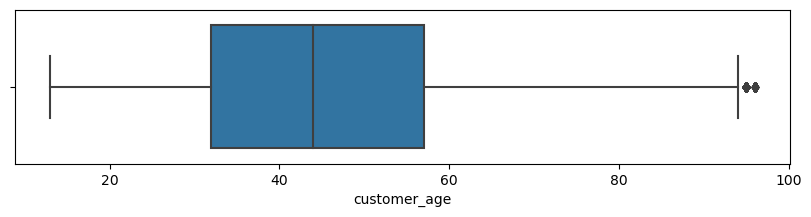

In [75]:
plt.figure(figsize=(10,2))
sns.boxplot(df['customer_age'])
plt.show()

In [76]:
df['customer_age'].describe(percentiles=[0.1,0.25,0.50,0.75,0.80,0.86,0.90,0.95,0.96,0.97,0.98,0.99])

count    1.852394e+06
mean     4.576596e+01
std      1.741268e+01
min      1.300000e+01
10%      2.500000e+01
25%      3.200000e+01
50%      4.400000e+01
75%      5.700000e+01
80%      6.000000e+01
86%      6.600000e+01
90%      7.000000e+01
95%      7.900000e+01
96%      8.300000e+01
97%      8.500000e+01
98%      8.900000e+01
99%      9.100000e+01
max      9.600000e+01
Name: customer_age, dtype: float64

In [77]:
percentile = df['customer_age'].quantile([0.05,0.99]).values
df['customer_age'][df['customer_age']<= percentile[0]] = percentile[0]
df['customer_age'][df['customer_age']>= percentile[1]] = percentile[1]

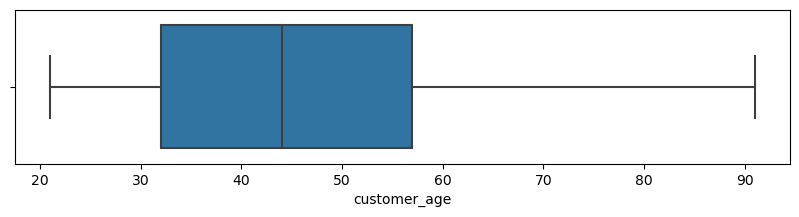

In [78]:
plt.figure(figsize=(10,2))
sns.boxplot(df['customer_age'])
plt.show()

<AxesSubplot:xlabel='customer_age', ylabel='Density'>

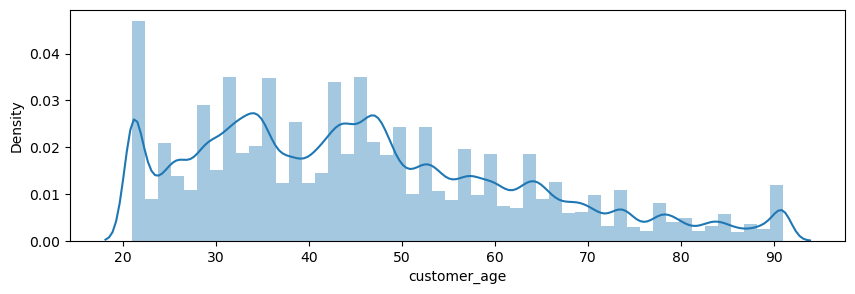

In [79]:
plt.figure(figsize=(10,3))
sns.distplot(df['customer_age'])

### 10. Distance

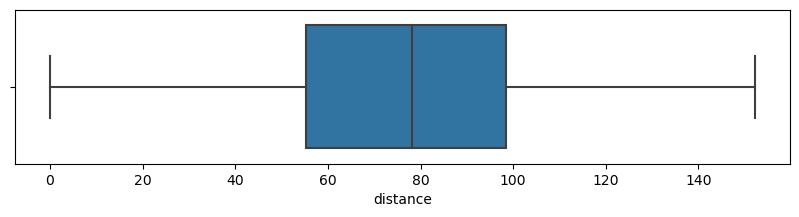

In [80]:
plt.figure(figsize=(10,2))
sns.boxplot(df['distance'])
plt.show()

In [81]:
df.head()

,amt,city_pop,is_fraud,Label,customer_age,distance,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,Male,CA,NY,Others,PA,TX,6-11,12-17,18-23,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,4.97,3495,0,Train,30,78.60,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,107.23,149,0,Train,40,30.21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,179.72,4154,0,Train,56,108.21,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,45.00,1939,0,Train,51,95.67,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,41.96,139,0,Train,32,77.56,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Multicollinearity

In [82]:
# Checking for Continuous variables columns for multicollinearity as value greater than 0.7 is significant for multicollinearity
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.6
corr_columns = [column for column in upper.columns if any(upper[column] > 0.6)]
corr_columns

[]

In [83]:
df.columns = df.columns.astype(str)

## Train Test split.

In [84]:
# We need to split back the data based on label.
train_df = df[df['Label']=='Train']
test_df = df[df['Label']=='Test']

In [85]:
# Dropping the Label column as its of no use now.
train_df.drop('Label', axis =1, inplace = True)
test_df.drop('Label', axis =1, inplace = True)

## Feature Scaling

In [86]:
y_train = train_df['is_fraud']
X_train = train_df.drop(['is_fraud'],axis=1)

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()

X_train[['amt','city_pop','customer_age','distance']] = scaler.fit_transform(X_train[['amt','city_pop','customer_age','distance']])

In [89]:
# Now as the scaled data is a numpy array
# We will have to convert it into a dataframe again

In [90]:
X_train.describe()

,amt,city_pop,customer_age,distance,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,Male,CA,NY,Others,PA,TX,6-11,12-17,18-23,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,3.085432e-01,2.752525e-01,3.514489e-01,5.002943e-01,7.053502e-02,1.015359e-01,3.505273e-02,9.535003e-02,6.623017e-02,9.494669e-02,8.717296e-02,4.880714e-02,6.143020e-02,6.999287e-02,7.522548e-02,8.997783e-02,3.123913e-02,4.525513e-01,4.346502e-02,6.439624e-02,7.215463e-01,6.157827e-02,7.316868e-02,1.955355e-01,3.023294e-01,3.056093e-01,7.531340e-02,1.108905e-01,1.040893e-01,1.132705e-01,1.109075e-01,6.678312e-02,6.737155e-02,5.448705e-02,5.302639e-02,5.430891e-02,1.087859e-01,1.961031e-01,1.549787e-01,1.932473e-01,1.135867e-01,1.235676e-01,1.010839e-01
std,2.888147e-01,3.883118e-01,2.455510e-01,1.914331e-01,2.560466e-01,3.020371e-01,1.839132e-01,2.936979e-01,2.486841e-01,2.931414e-01,2.820885e-01,2.154647e-01,2.401178e-01,2.551351e-01,2.637549e-01,2.861501e-01,1.739634e-01,4.977437e-01,2.039015e-01,2.454576e-01,4.482381e-01,2.403881e-01,2.604133e-01,3.966125e-01,4.592674e-01,4.606652e-01,2.638965e-01,3.139967e-01,3.053765e-01,3.169233e-01,3.140177e-01,2.496461e-01,2.506645e-01,2.269763e-01,2.240862e-01,2.266263e-01,3.113706e-01,3.970476e-01,3.618845e-01,3.948454e-01,3.173087e-01,3.290877e-01,3.014399e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.067013e-02,1.282106e-02,1.571429e-01,3.636752e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.542870e-01,4.918276e-02,3.142857e-01,5.142012e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.552121e-01,4.285502e-01,5.142857e-01,6.474688e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0000

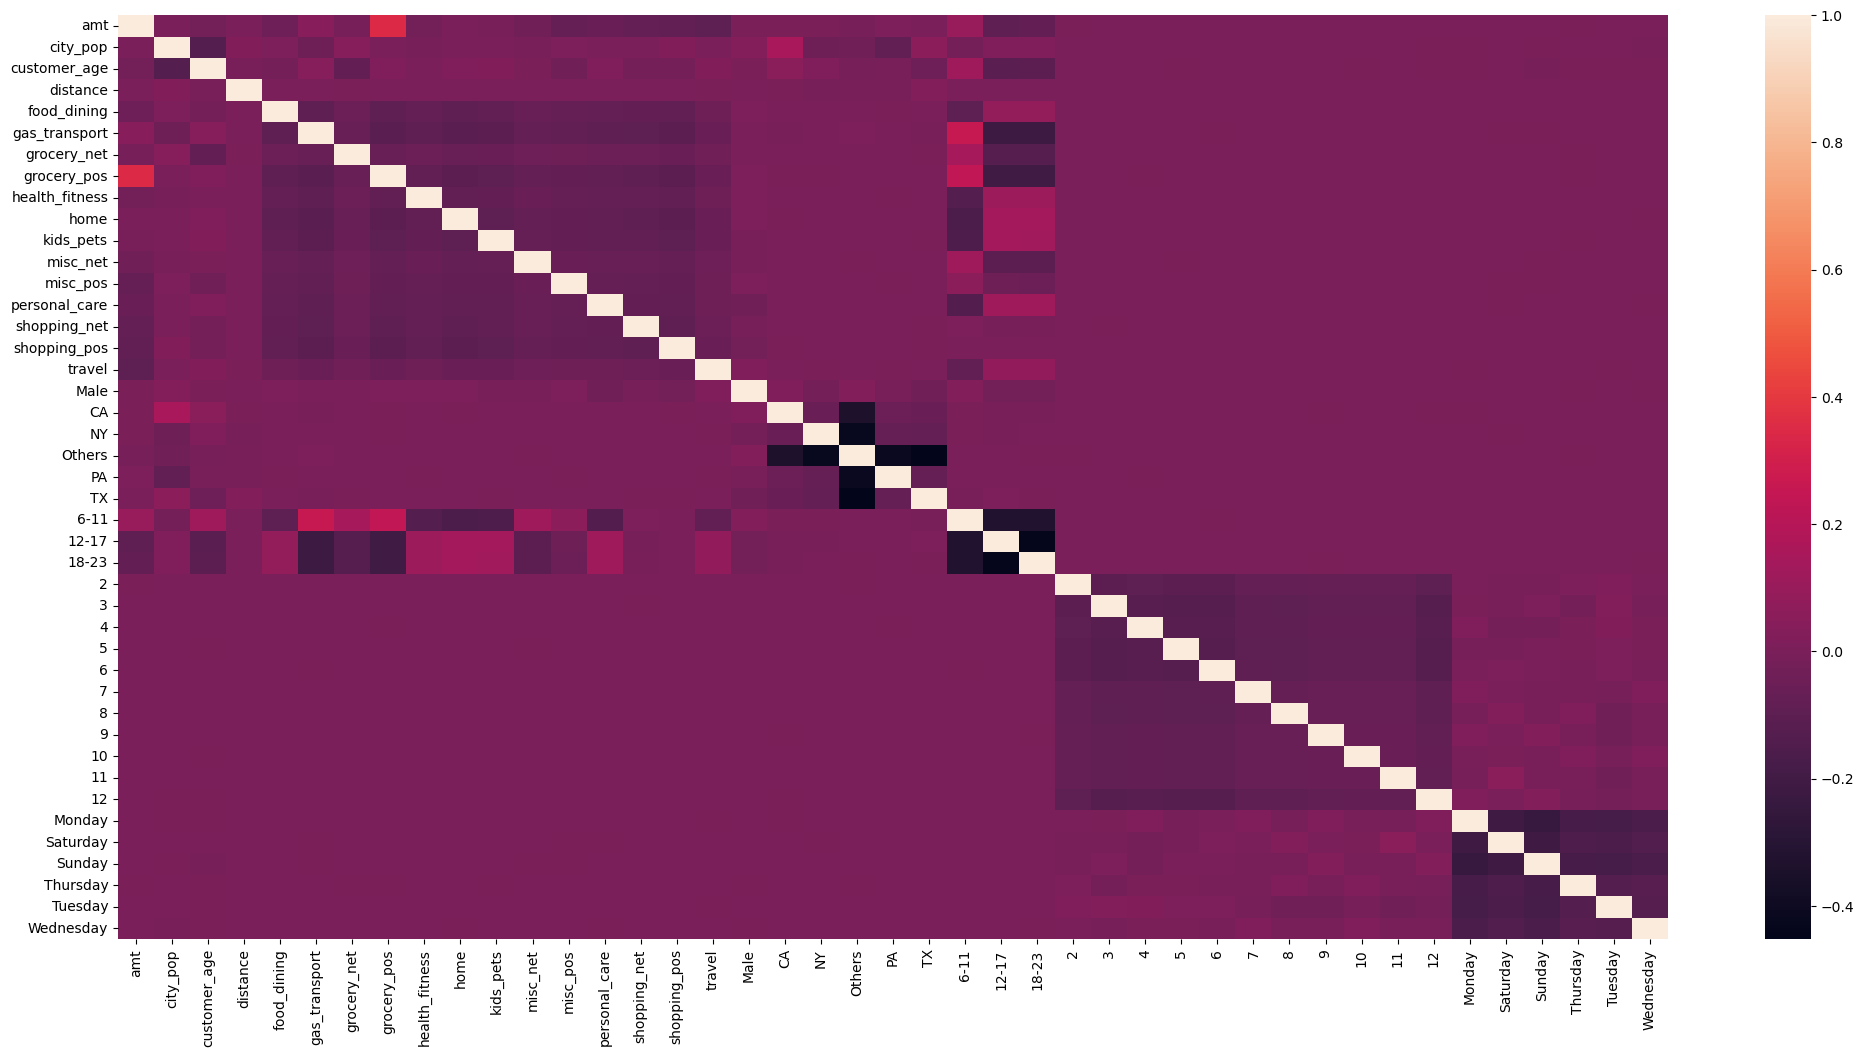

In [91]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,12))        # Size of the figure
sns.heatmap(X_train.corr())
plt.show()

## Handling Class Imbalance

- As we know that target label is still highly imbalanced approx 99.5 % : 0.5 %
- Challenges related to imbalanced dataset are Biased predictions,Misleading accuracy.
- We will try various oversampling techniques for our class imbalance on different models:
    1. Random over sampling
    2. SMOTE
    3. ADASYN

## Logistic Regression

In [92]:
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [93]:
# As we need to predict on test data as well we need to first divide the test data into X_test and y_test
y_test = test_df['is_fraud']
X_test = test_df.drop(['is_fraud'],axis=1)

In [94]:
# Scaling the test data as well
X_test[['amt','city_pop','customer_age','distance']] = scaler.transform(X_test[['amt','city_pop','customer_age','distance']])

> ### 1. Base Model

In [95]:
# Logistic Regression
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [96]:
y_pred = lreg.predict(X_test)

In [97]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9963308794552642
F1 score:  0.0941803642825411
Recall:  0.04941724941724942
Precision:  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      0.05      0.09      2145

    accuracy                           1.00    555719
   macro avg       1.00      0.52      0.55    555719
weighted avg       1.00      1.00      0.99    555719


 confussion matrix:
 [[553574      0]
 [  2039    106]]


> ### 2. Random Oversampling

In [98]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

2578338

In [99]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 1289169), (1, 1289169)]


In [100]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [101]:
y_pred_os

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
# Lets check the score for oversampling technique
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.8420316742814264
F1 score:  0.03495811621924675
Recall:  0.7412587412587412
Precision:  0.017901172020130373

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91    553574
           1       0.02      0.74      0.03      2145

    accuracy                           0.84    555719
   macro avg       0.51      0.79      0.47    555719
weighted avg       1.00      0.84      0.91    555719


 confussion matrix:
 [[466343  87231]
 [   555   1590]]


> ### 3. SMOTE

In [103]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

2578338

In [104]:
#print(sorted(Counter(y_resampled_smt).items()))

In [105]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [106]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.8910546517214636
F1 score:  0.04631161098246775
Recall:  0.6853146853146853
Precision:  0.023965567837229775

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.02      0.69      0.05      2145

    accuracy                           0.89    555719
   macro avg       0.51      0.79      0.49    555719
weighted avg       0.99      0.89      0.94    555719


 confussion matrix:
 [[493706  59868]
 [   675   1470]]


## Decision Trees

> ### 1. Random Oversampling

In [107]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [108]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9971514380469266
F1 score:  0.6360082777650035
Recall:  0.6447552447552447
Precision:  0.6274954627949183

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.63      0.64      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.81      0.82      0.82    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552753    821]
 [   762   1383]]


> ### 2. SMOTE

In [109]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [110]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.9911969898455875
F1 score:  0.37808288838037124
Recall:  0.6932400932400933
Precision:  0.2599195944764901

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.26      0.69      0.38      2145

    accuracy                           0.99    555719
   macro avg       0.63      0.84      0.69    555719
weighted avg       1.00      0.99      0.99    555719


 confussion matrix:
 [[549340   4234]
 [   658   1487]]


As we can see above on the summary table, we have recall value highest for Logistic regression Random oversampling of '0.73'.

# Model evaluation cross validation

## Logistic regression

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
# Logistic regression model
# Feature Selection Using RFE

In [113]:
cross_val_score(lreg_os, X_resampled_os, y_resampled_os, cv=5, n_jobs=-1)

array([0.76382479, 0.64654778, 0.52452741, 0.55798606, 0.77639058])

In [114]:
# Check a logistic regression model with better recall
cross_val_score(lreg_os, X_resampled_os, y_resampled_os, cv=5, n_jobs=-1, scoring="recall")

array([0.80890806, 0.79115633, 0.79791261, 0.80288792, 0.79667926])

## Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=10, oob_score=True)
rf.fit(X_resampled_os, y_resampled_os)

y_pred_rf = rf.predict(X_test)

In [116]:
# Accuracy score on unseen test data
accuracy_score(y_test, y_pred_rf)

0.9978496326380779

In [117]:
# By default cross val score gives accuracy
cross_val_score(rf, X_resampled_os, y_resampled_os, cv=5, n_jobs=-1)

array([0.99966257, 0.83367399, 0.85429385, 0.79115204, 0.99962767])

In [118]:
# Check a random forest model with better recall
cross_val_score(rf, X_resampled_os, y_resampled_os, cv=5, n_jobs=-1, scoring="recall")

array([1., 1., 1., 1., 1.])

In [119]:
# Lets check the score for oversampling technique
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9978496326380779
F1 score:  0.6535227602203536
Recall:  0.5254079254079254
Precision:  0.8642638036809815

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.86      0.53      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.76      0.83    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[553397    177]
 [  1018   1127]]


## Feature selection

In [120]:
X_resampled_os.shape

(2578338, 43)

### Cross validation for feature selection - RFECV
- Since we dont know how much features are required for getting a good model.
- We have a RFECV Module in sklearn for this.

In [121]:
from sklearn.feature_selection import RFECV

In [121]:
rfecv = RFECV(estimator=lreg_os, cv=4, n_jobs=-1)

In [122]:
# %%time
rfecv.fit(X_resampled_os, y_resampled_os)

MemoryError: Unable to allocate 634. MiB for an array with shape (43, 1933753) and data type float64

In [ ]:
rfecv.n_features_

## Hyper-parameter tuning using Cross Validation

### GridSearchCV

In [ ]:
# Logistic regression

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

In [125]:
clf = GridSearchCV(lreg_os,                    # model
                   param_grid = parameters,    # hyperparameters
                   scoring='recall',           # metric for scoring
                   cv=5,                       # number of folds
                  n_jobs=-1,
                  return_train_score=True)

In [126]:
clf.fit(X_resampled_os, y_resampled_os)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
clf.best_score_

In [ ]:
clf.best_estimator_

In [ ]:
# Random Forest

In [127]:
rf_cv = RandomForestClassifier(random_state=42, n_jobs=-1)

In [128]:
hyper_params = {'max_depth': [3, 5, 10, 15],
                'max_features': [3, 5, 7, 11],
                'min_samples_leaf': [20, 50, 100, 200],
                'n_estimators': [10, 25, 50, 80]
               }

In [129]:
rf_model_cv = GridSearchCV(estimator=rf_cv, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [ ]:
rf_model_cv.fit(X_resampled_os, y_resampled_os)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


### Other cross validation schemes in Sklearn

In [ ]:
logreg = LogisticRegression(random_state=42)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

### KFold

In [ ]:
folds = KFold(n_splits=5)

In [ ]:
scores = cross_val_score(logreg, X_resampled_os, y_resampled_os, cv=folds, scoring="recall")
scores

### Stratified KFold

In [ ]:
folds = StratifiedKFold(n_splits=5)

In [ ]:
scores = cross_val_score(logreg,X_resampled_os, y_resampled_os, cv=folds, scoring="recall")
scores

## Plot the ROC curve

### Using Oversampled Logistic regression

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
plot_roc_curve(lreg_os, X_resampled_os, y_resampled_os, drop_intermediate=False)
plt.show()

### Using GridsearchCV logistic regression

In [ ]:
# For best score using gridsearch CV we can use it to see if our score has increased.
Logreg_best = clf.best_estimator_

In [ ]:
plot_roc_curve(Logreg_best, X_resampled_os, y_resampled_os)
plt.show()

### Using Random forest

In [ ]:
RF_best = rf_model_cv.best_estimator_

In [ ]:
plot_roc_curve(RF_best, X_resampled_os, y_resampled_os)
plt.show()

In [ ]:
lreg_os.feature_importances_

In [ ]:
clf.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": clf.feature_importances_
})

Since this is the best Accuracy and recall value we have got after doing research on all the models and using all the techniques.

In [ ]:
# The Best model we found was Logistic regresion Random Over sampling model with a recall of 0.74